In [ ]:
%pip install matplotlib

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os
import matplotlib as mpl
if os.environ.get('DISPLAY', '') == '':
    print('no display found. Using non-interactive Agg backend')
#     mpl.use('Agg')
import future.utils
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
import json
import numpy as np
import tqdm


In [ ]:
print('matplotlib: {}'. format(mpl.__version__))

# Preliminaries

In [ ]:
results = pd.read_csv("aggregate/results_media_model.csv", index_col=[0])


In [ ]:
results = results[results['gam'] != 0.25]
results

In [ ]:
gams = list(results.gam.unique())
p_medias = list(results.p_media.unique())
epss = list(results.eps.unique())
mos = list(results.media_op.unique())
print(gams, p_medias, epss, mos)

In [ ]:
threemedia = results[results['media_op'] == '0.05;0.5;0.95']
print(len(threemedia))
gams = list(threemedia.gam.unique())
p_medias = list(threemedia.p_media.unique())
epss = list(threemedia.eps.unique())
mos = list(threemedia.media_op.unique())
print(gams, p_medias, epss, mos)

In [ ]:
twomedia = results[results['media_op'] == '0.05;0.95']
print(len(twomedia))
gams = list(twomedia.gam.unique())
p_medias = list(twomedia.p_media.unique())
epss = list(twomedia.eps.unique())
mos = list(twomedia.media_op.unique())
print(gams, p_medias, epss, mos)

In [ ]:
extremist = results[results['media_op'] == '0.0']
print(len(extremist))
gams = list(extremist.gam.unique())
p_medias = list(extremist.p_media.unique())
epss = list(extremist.eps.unique())
mos = list(extremist.media_op.unique())
print(gams, p_medias, epss, mos)

In [ ]:
moderate = results[results['media_op'] == '0.5']
print(len(moderate))
gams = list(moderate.gam.unique())
p_medias = list(moderate.p_media.unique())
epss = list(moderate.eps.unique())
mos = list(moderate.media_op.unique())
print(gams, p_medias, epss, mos)

In [ ]:
deffuant = results[results['gam']==0.0]

In [ ]:
measures = list(deffuant.columns)[8:]

In [ ]:
print(measures)

# Bounded confidence model with media

In [ ]:
%cd plots

In [ ]:
%mkdir "deffuant"

In [ ]:
%cd deffuant

In [ ]:
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

hex_list = ['#357db0', '#ce2626']

cmap=get_continuous_cmap(hex_list)

avg_05_perc


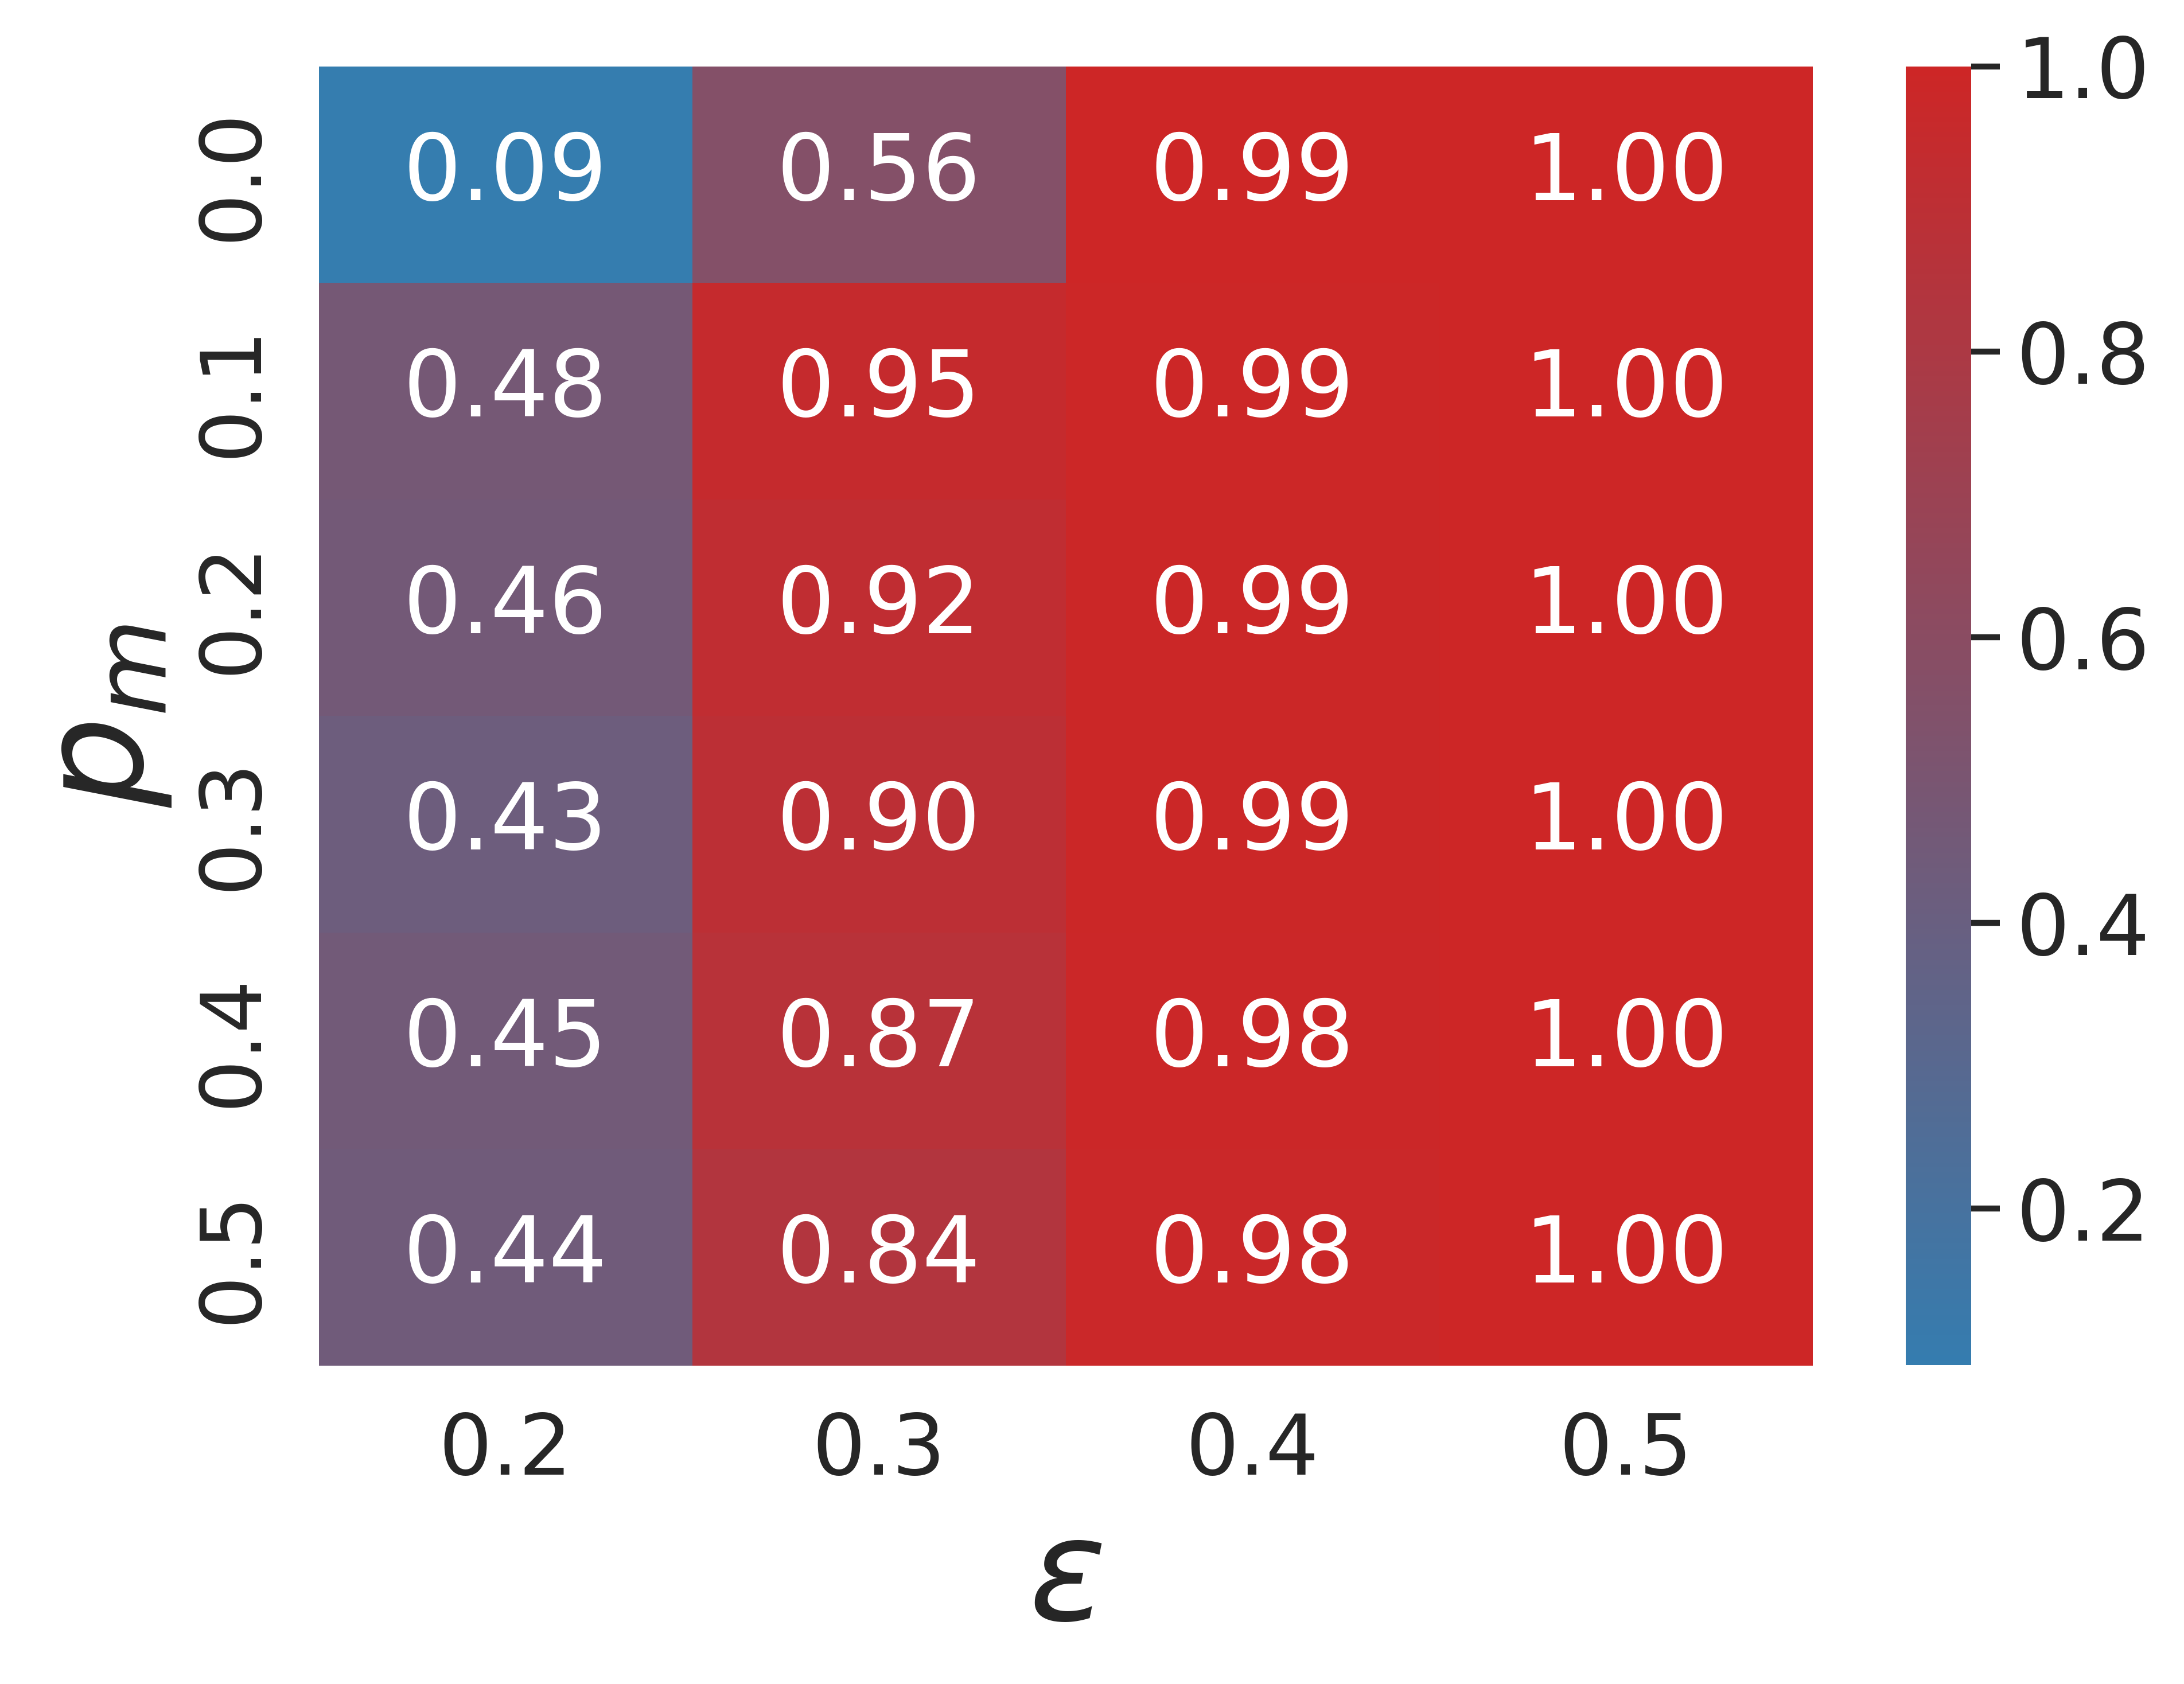

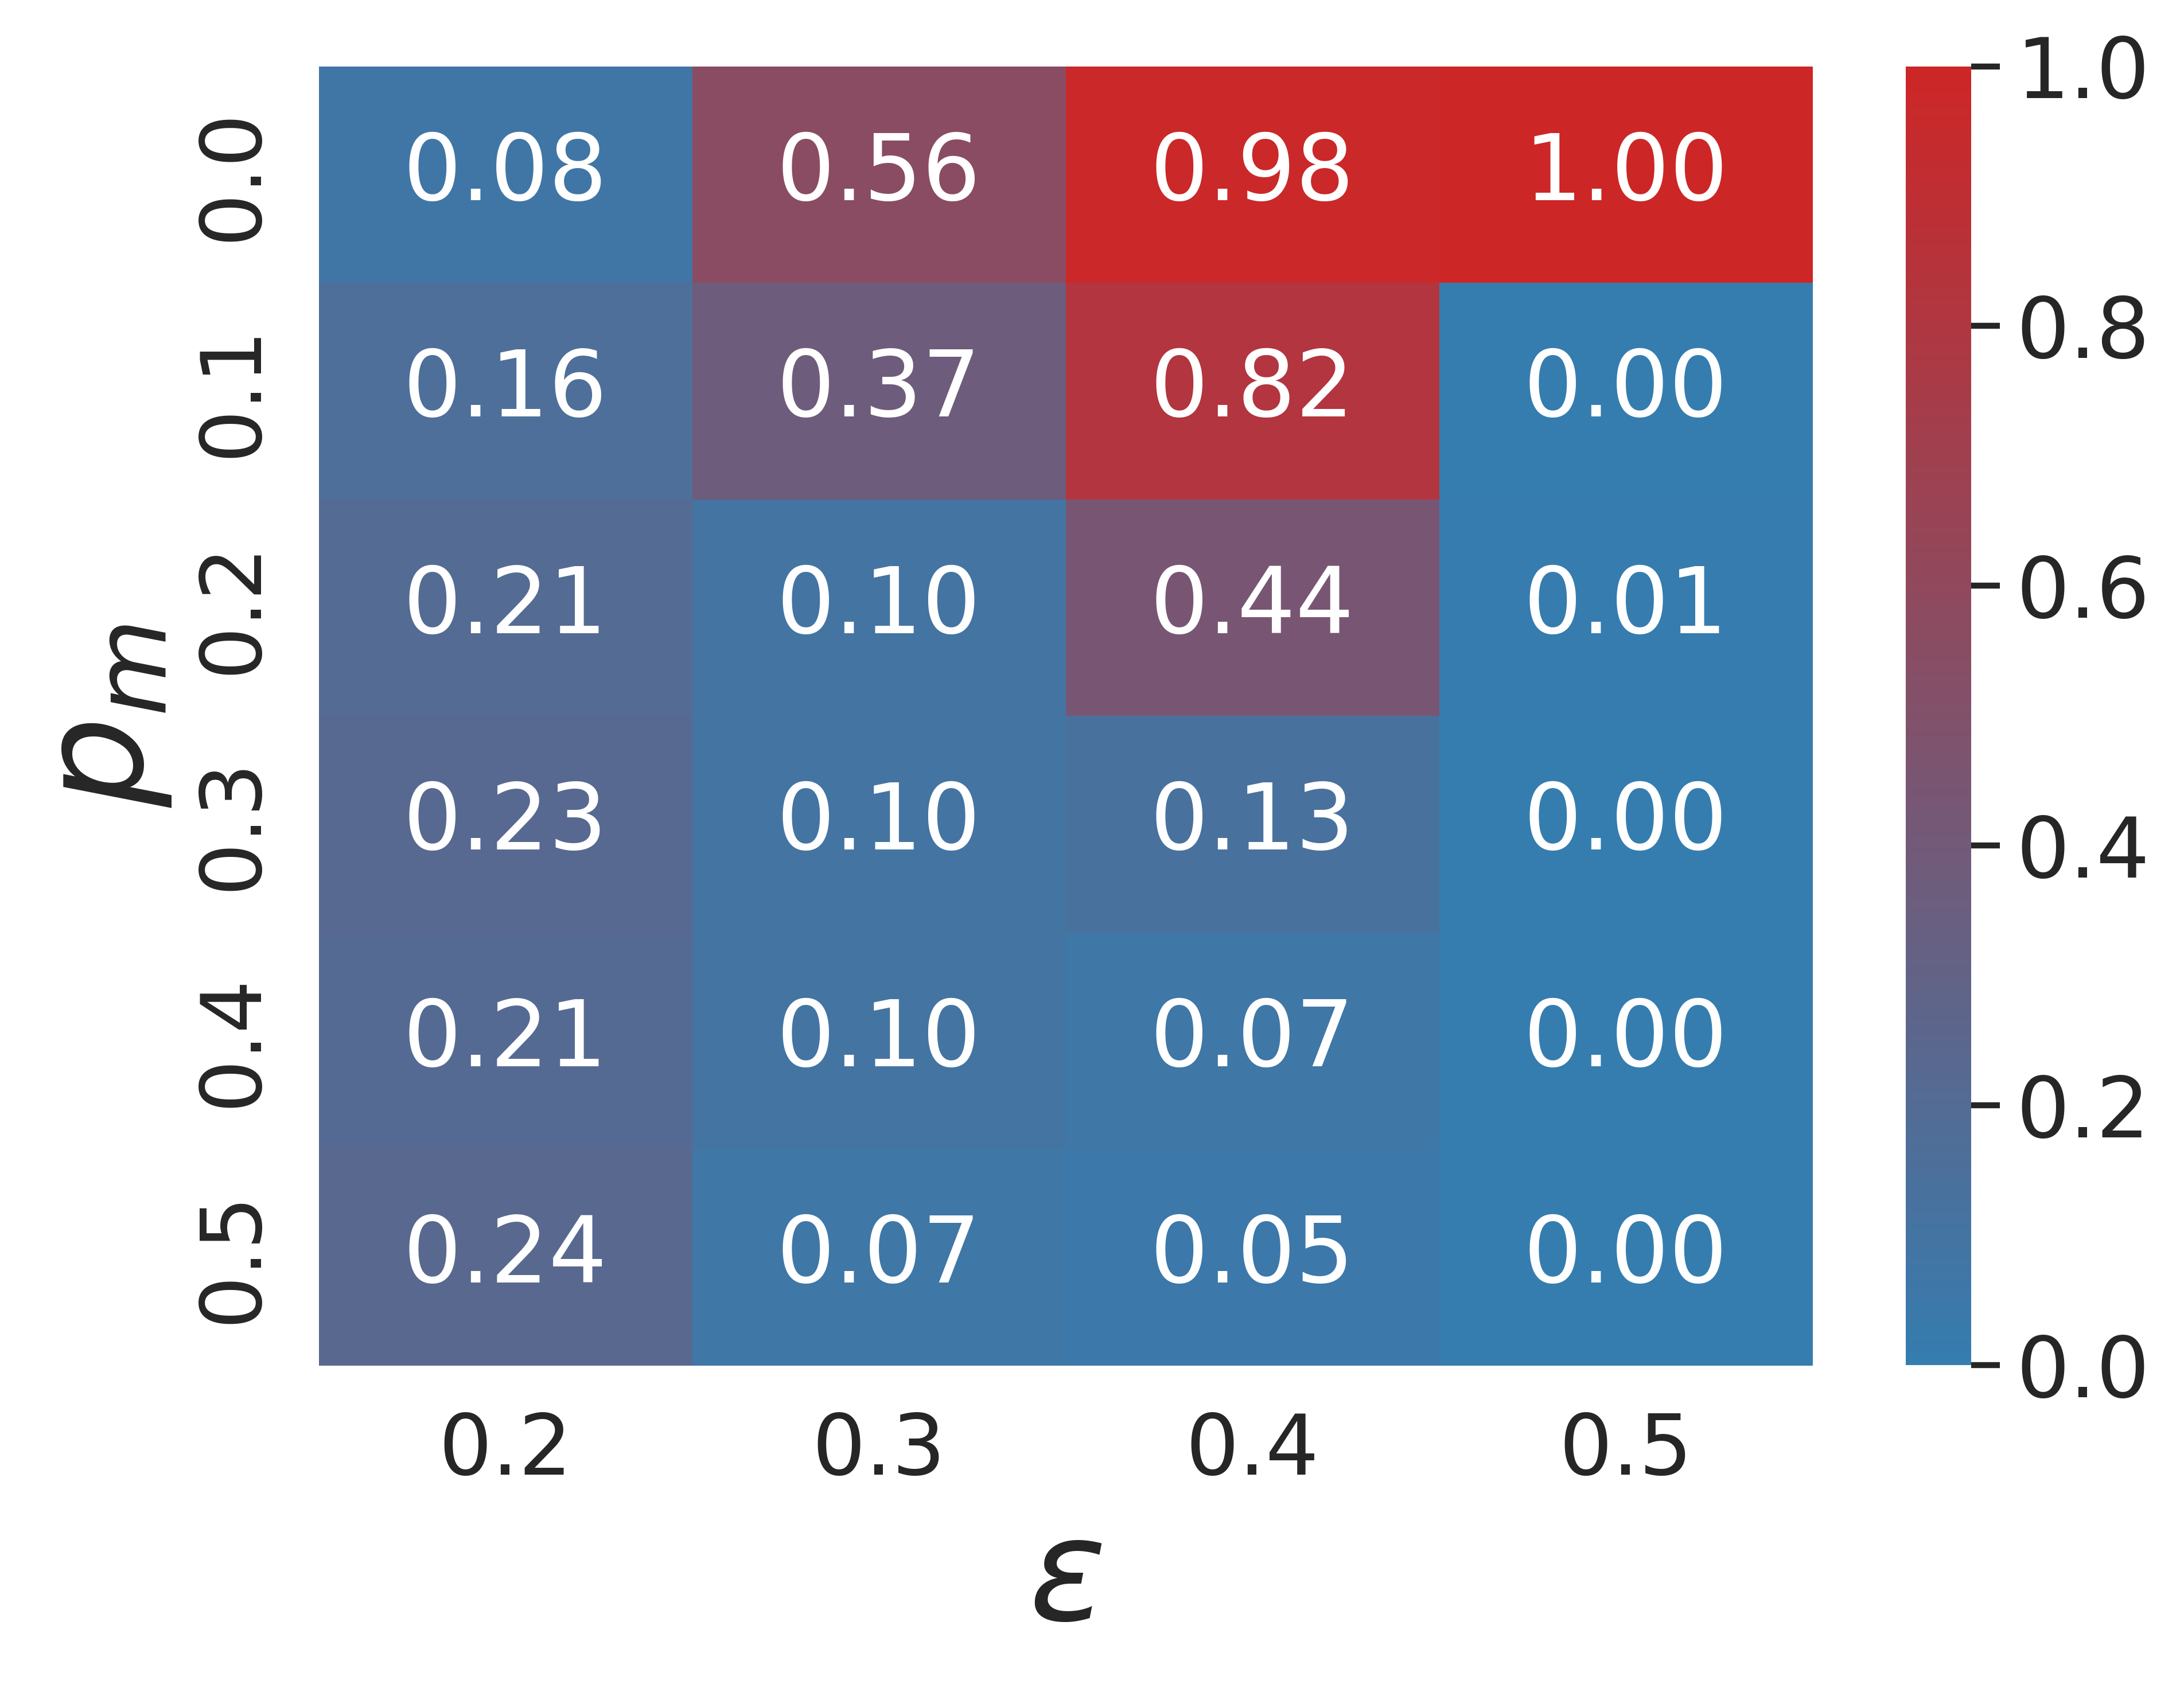

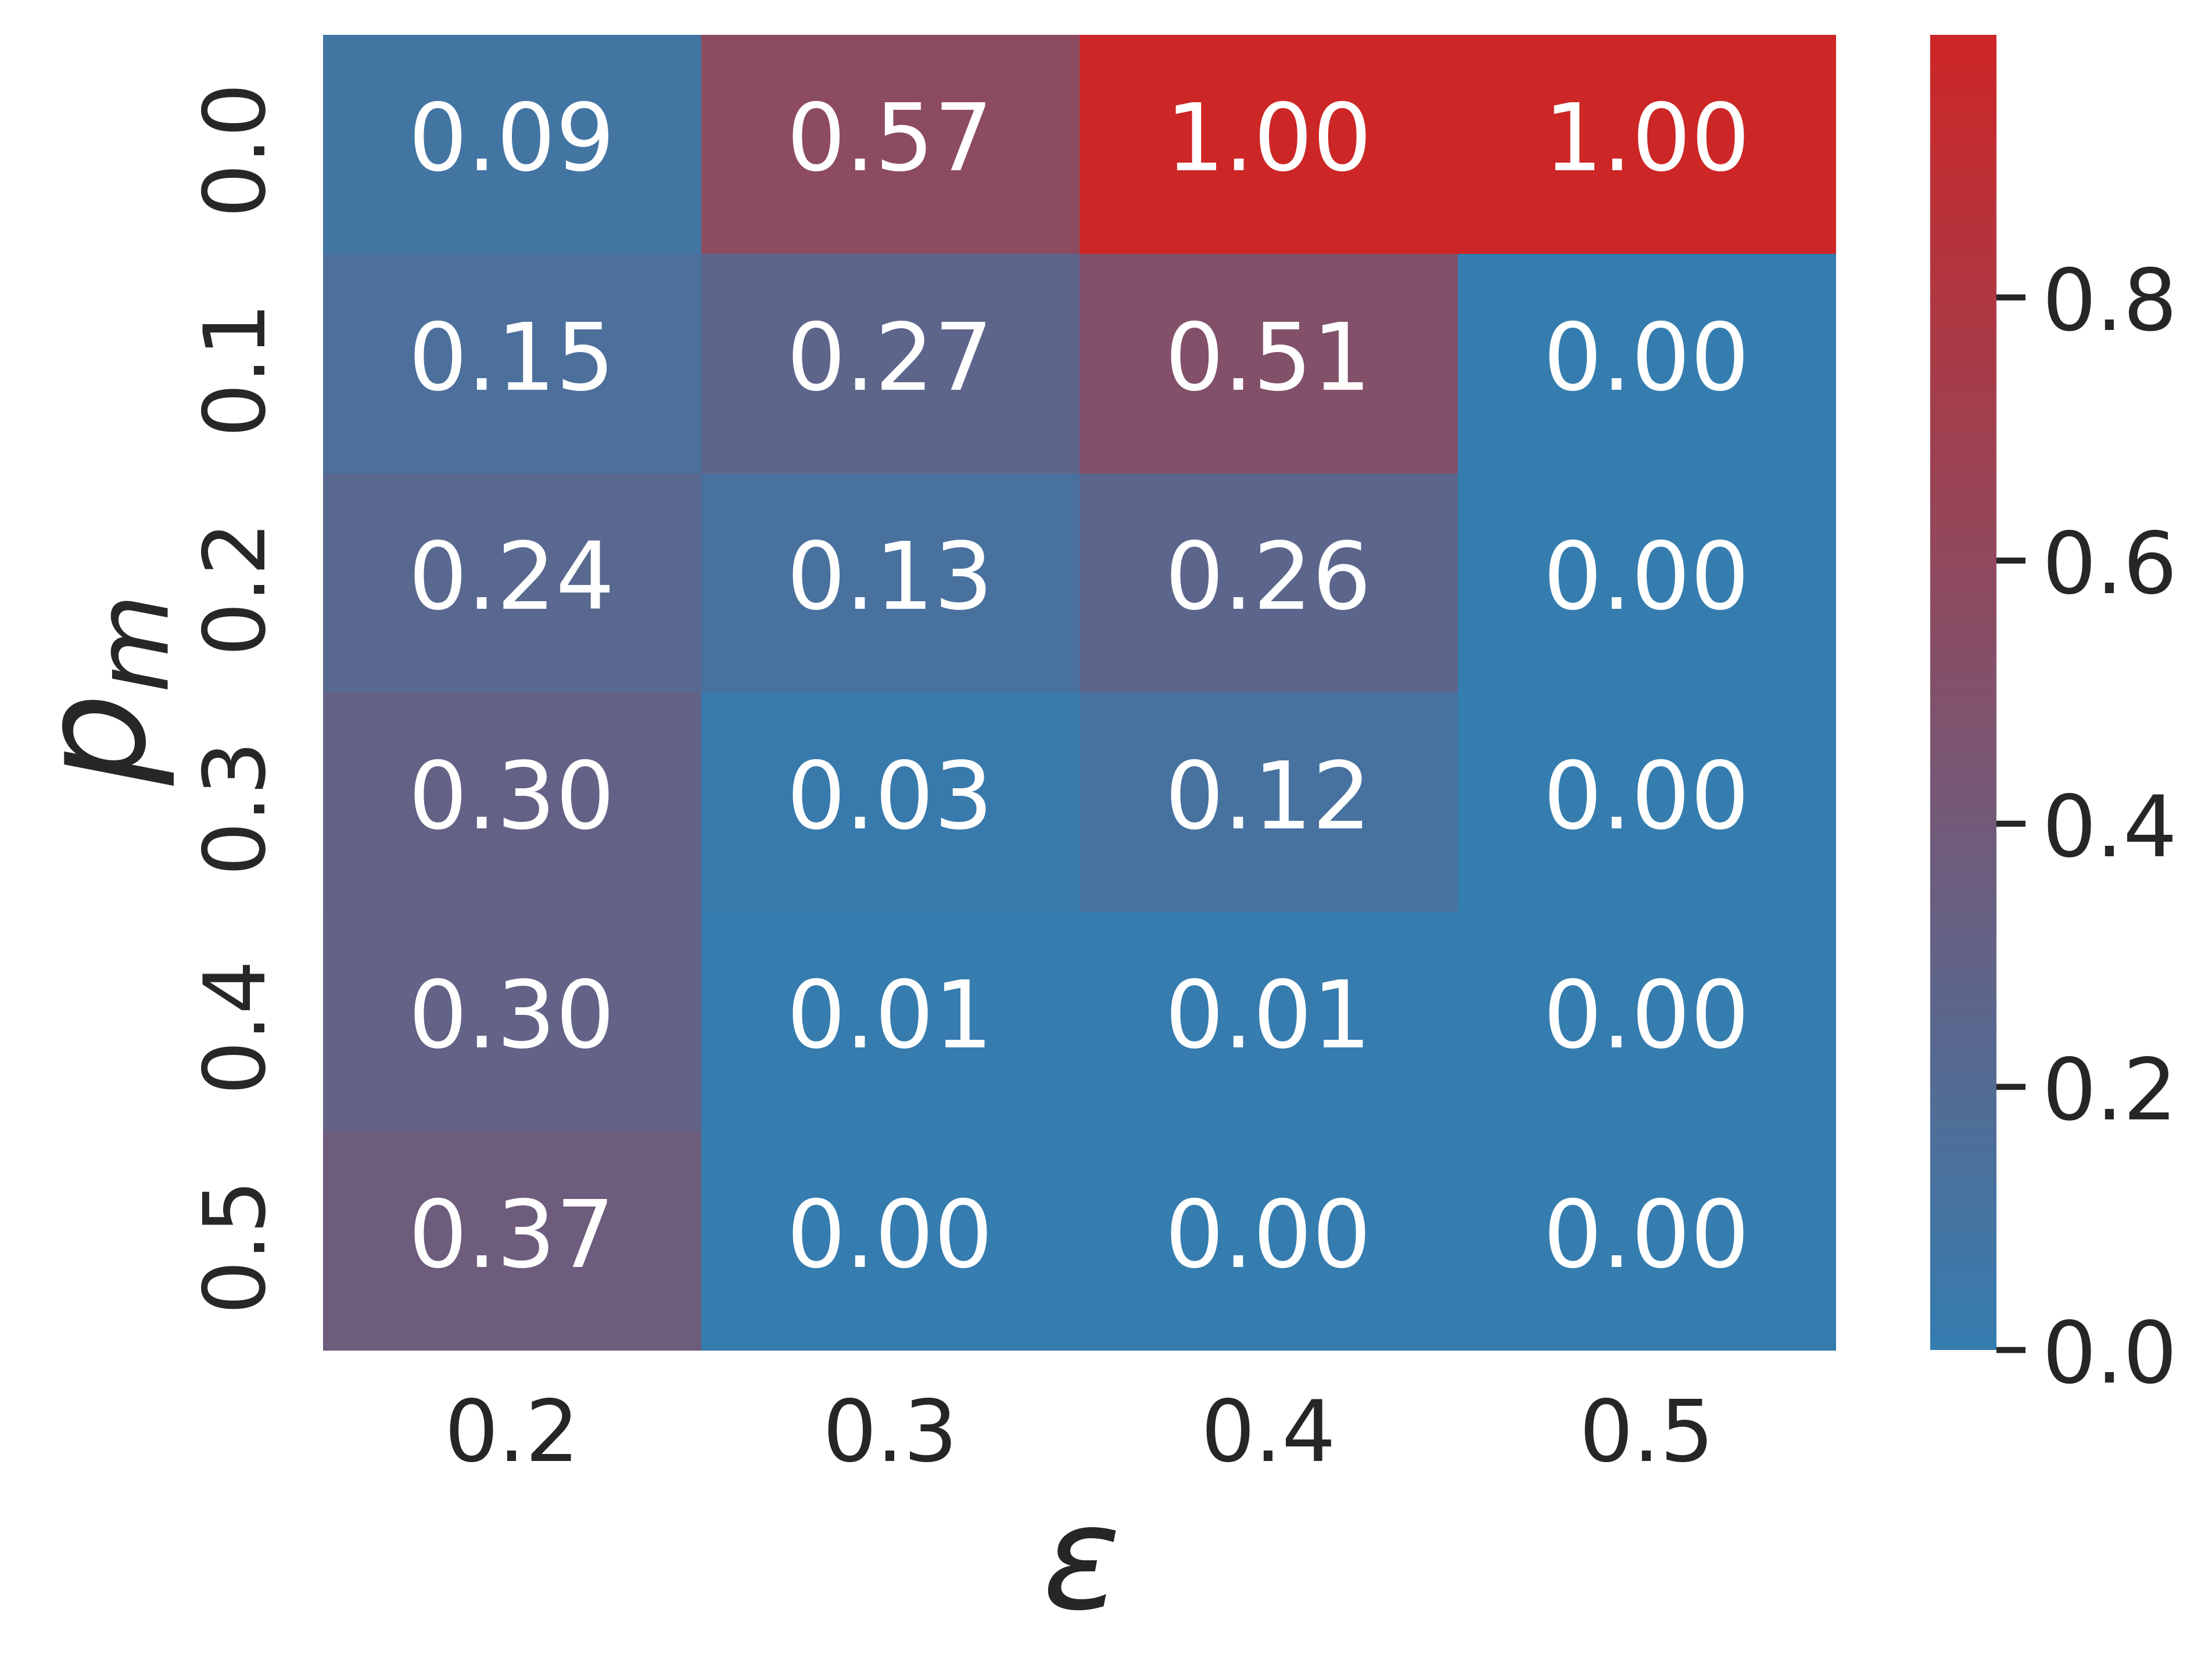

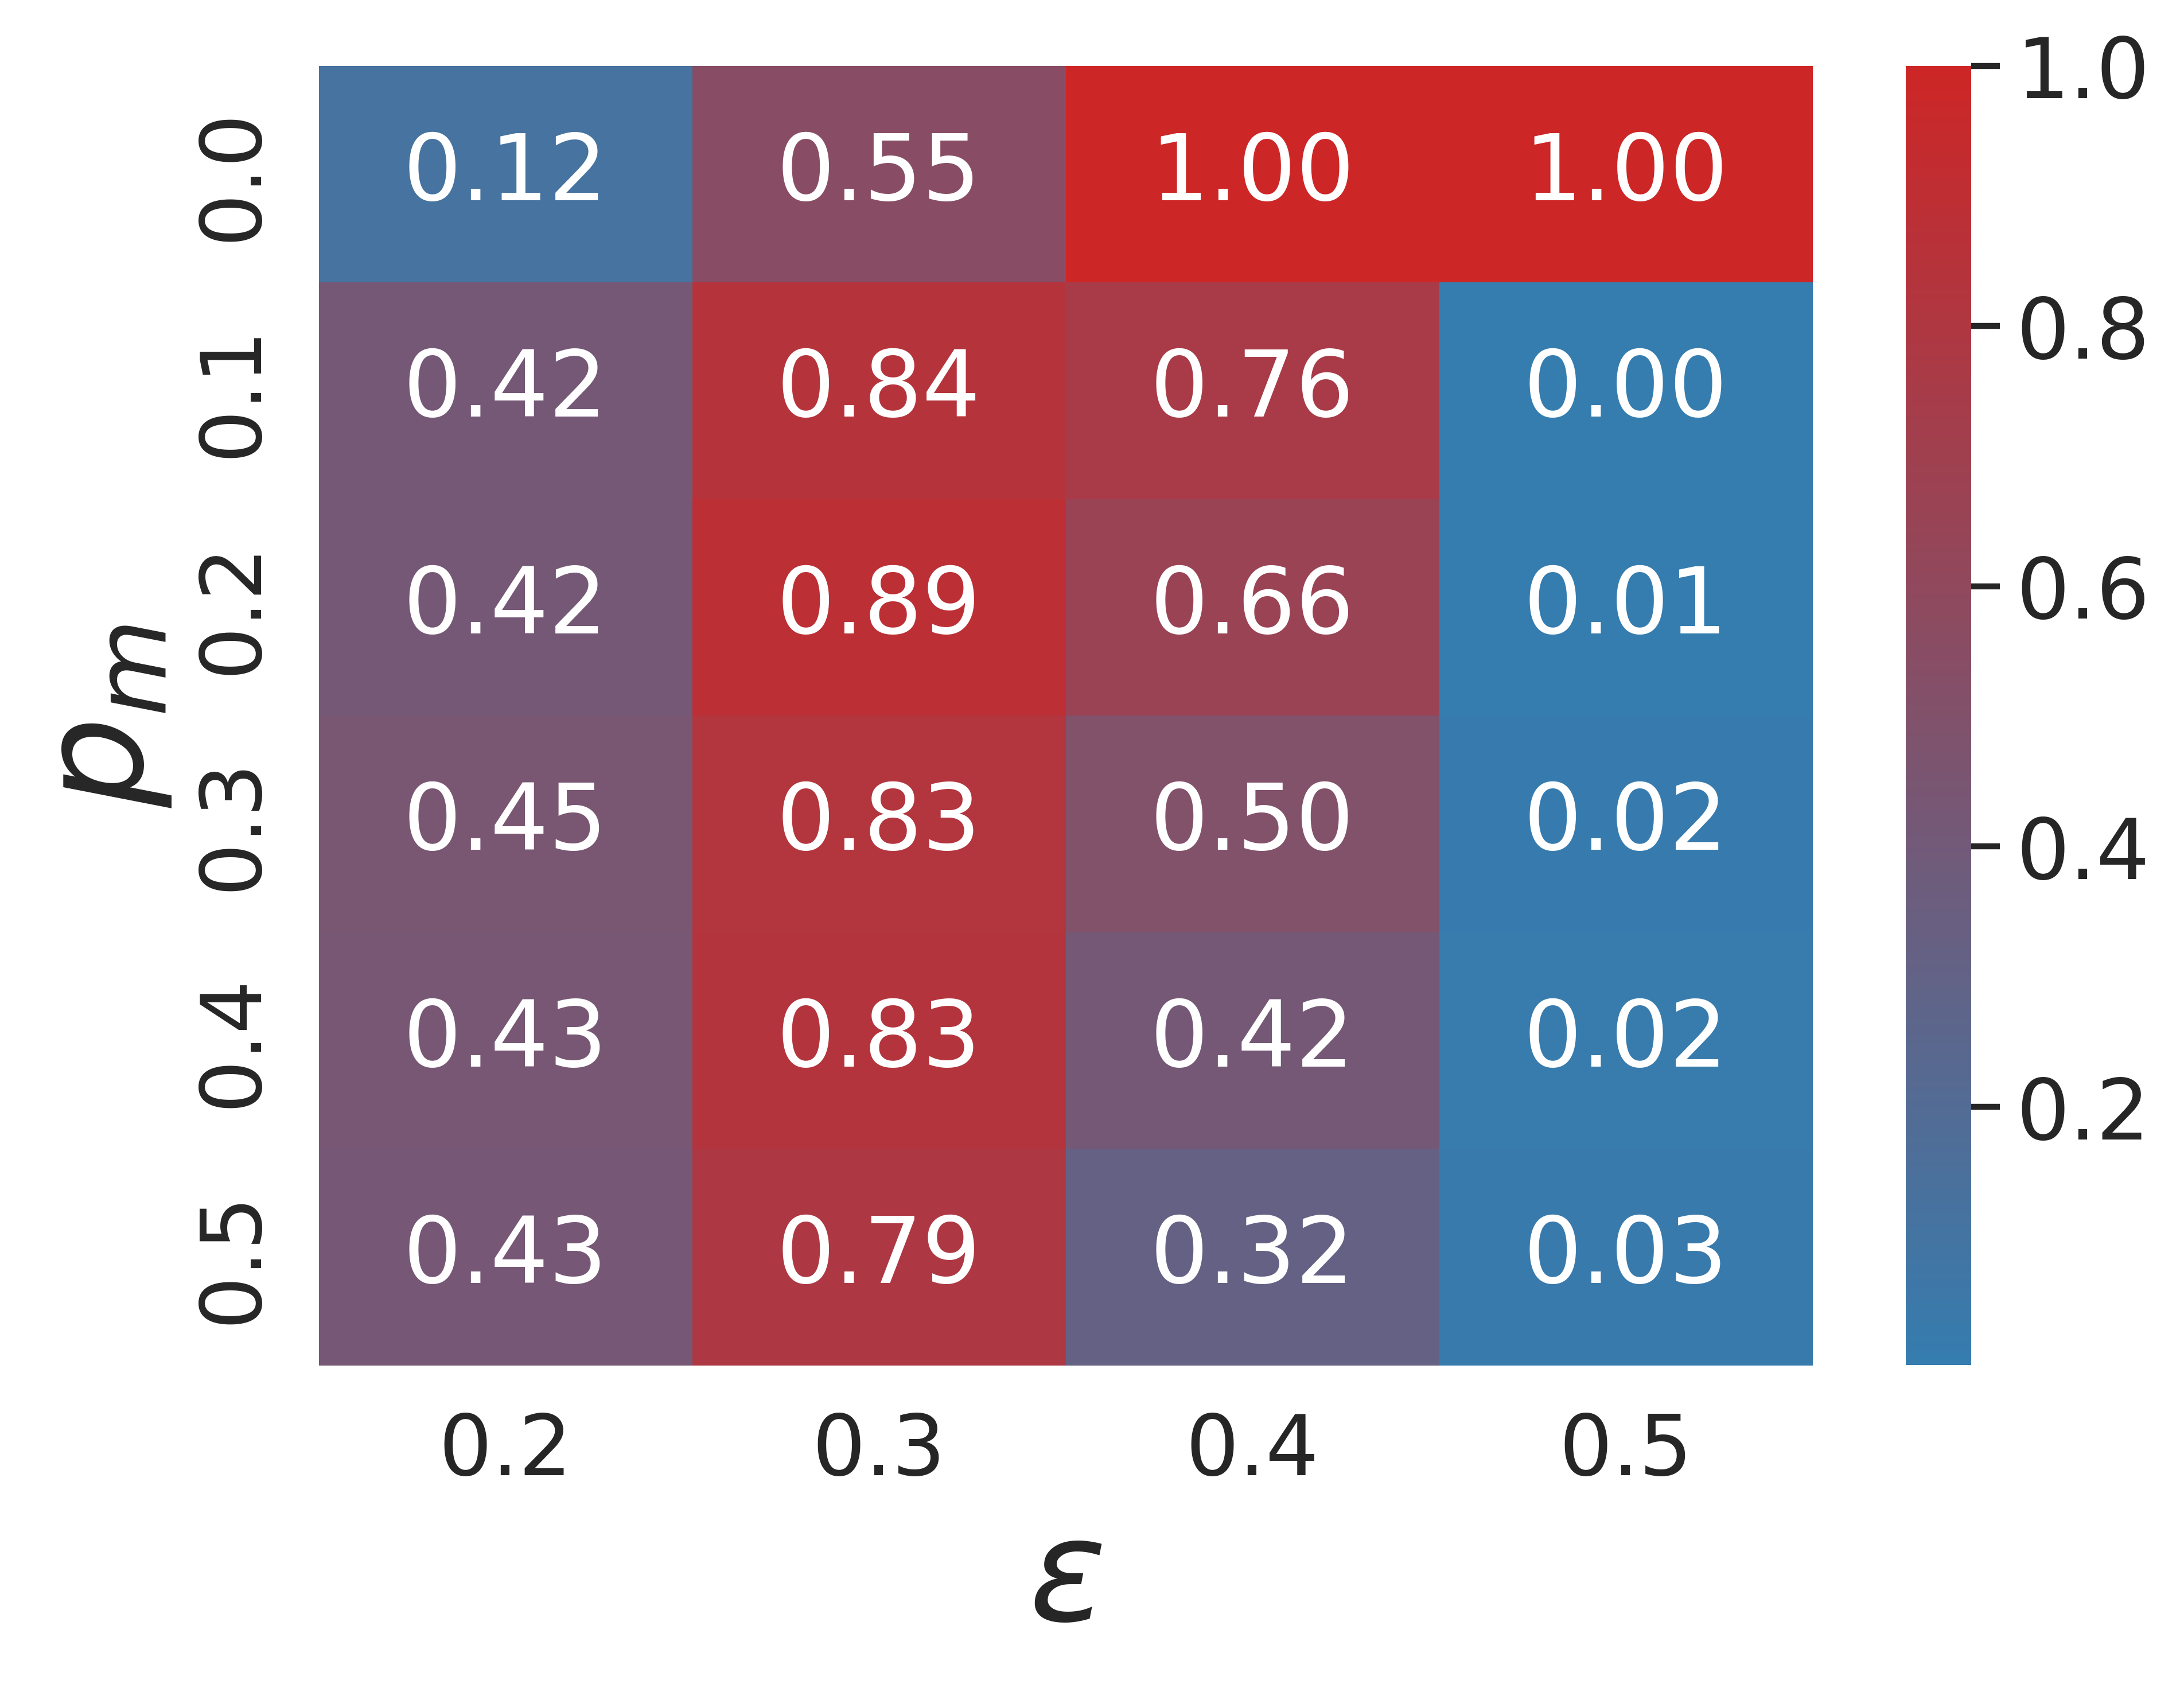

In [69]:
sns.set(font_scale=1.6)
for measure in ['avg_05_perc']:
    print(measure)
    i=0
    for mo in ['0.5', '0.0', '0.05;0.95', '0.05;0.5;0.95']:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), dpi=600)
        titles = ['moderate', 'extremist', 'polarized', 'balanced']
        x = "p_media"
        y = "eps"
        data = deffuant[deffuant["media_op"]==mo]
        df = data.pivot(x, y, measure)
        a=sns.heatmap(df, cbar=True, fmt=".2f", annot=True, ax = ax, cmap=cmap)
        ax.set_xlabel(r'$\epsilon$', fontsize=30)
        ax.set_ylabel(r'$p_m$', fontsize=30)
        plt.savefig(f'{measure}_{titles[i]}_deffuant_heatmap.png')
        i+=1


In [ ]:
%xmode Verbose

In [ ]:
measures

In [ ]:
sns.set(font_scale=1.8)
sns.set_style("whitegrid")
for measure in ['avg_05_perc']:
    print(measure)
    i=0
    for mo in ['0.5', '0.0', '0.05;0.95', '0.05;0.5;0.95']:
        titles = ['moderate', 'extremist', 'polarized', 'balanced']
        x = "p_media"
        y = "eps"
        data = deffuant[deffuant["media_op"]==mo]
        fig = plt.figure(figsize=(15, 10))
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(data['eps'], data['p_media'], data[measure], vmin=min(deffuant[measure]), vmax=max(deffuant[measure]), cmap=cmap, linewidth=0.0, alpha=0.8)
        surf=ax.plot_trisurf(data['eps'], data['p_media'], data[measure], cmap=cmap, linewidth=0.0, alpha=0.8)
        # fig.colorbar(surf, shrink=0.5, aspect=6).ax.tick_params(labelsize=22)
        ax.set_xlabel(r'$\epsilon$', fontsize=40, labelpad=30)
        ax.set_ylabel(r'$p_m$', fontsize=50, labelpad=30)
        ax.tick_params(axis='x', which='major', labelsize=22, pad=2, labelrotation=45)
        ax.tick_params(axis='y', which='major', labelsize=22, pad=10)
        ax.tick_params(axis='z', which='major', labelsize=22, pad=10)  
        ax.set_zlim(0.0, 1.0) 
        plt.savefig(f'{measure}_{titles[i]}_deffuant_surface.png')
        i+=1                

In [65]:
def from_res_to_iterations(name, nr):
    res = open("res/{}.csv".format(name))
    iterations = []
    it = 0
    for line in res.readlines():
        iterations.append(dict())
        iterations[it]['iteration'] = it
        iterations[it]['status'] = dict()

        opinions = line.strip().split(',')

        for i in range(len(opinions)):
            iterations[it]['status'][i] = float(opinions[i])
            iterations[it]['node_count'] = {0: 0},
            iterations[it]['status_delta'] = {0: 0}

        it += 1
        
    return iterations

hex_list = ['#357db0', '#18A558', '#ce2626']

def evolution(iterations, hex_list, fig, ax):

    """
    Generates the plot

    :param filename: Output filename
    :param percentile: The percentile for the trend variance area
    """

    nodes2opinions = {}
    node2col = {}

    last_it = iterations[-1]['iteration'] + 1
    last_seen = {}

    for it in iterations:
        sts = it['status']
        its = it['iteration']
        for n, v in sts.items():
            if n in nodes2opinions:
                last_id = last_seen[n]
                last_value = nodes2opinions[n][last_id]

                for i in range(last_id, its):
                    nodes2opinions[n][i] = last_value

                nodes2opinions[n][its] = v
                last_seen[n] = its
            else:
                nodes2opinions[n] = [0]*last_it
                nodes2opinions[n][its] = v
                last_seen[n] = 0
                if v < 0.33:
                    node2col[n] = hex_list[0]
                elif 0.33 <= v <= 0.66:
                    node2col[n] = hex_list[1]
                else:
                    node2col[n] = hex_list[2]

    mx = 0
    for k, l in future.utils.iteritems(nodes2opinions):
        if mx < last_seen[k]:
            mx = last_seen[k]
        x = list(range(0, last_seen[k]))
        y = l[0:last_seen[k]]
        ax.plot(x, y, lw=1, alpha=0.25, color=node2col[k])
    
    ax.set_ylim(-0.1, 1.1)
    # ax.set_xlim(0, 1000)
    ax.tick_params(axis='both', which='major', labelsize=4, pad=0) 
    # ax.set_xlabel("o", fontsize=5)
    # ax.set_ylabel("t", fontsize=5)               
    # plt.grid(axis = 'both', which='both')
    plt.tight_layout()

    
from tqdm import tqdm

def spaghettigridbye(results):
    mops = list(results.media_op.unique())
    pmlist = sorted(list(results.p_media.unique()))
    elist = sorted(list(results.eps.unique()))
    sns.set_style("whitegrid")
    i=0
    for mo in ['0.5', '0.0', '0.05, 0.95']:
        titles = ['moderate', 'extremist', 'polarized', 'balanced']
        fig, axes = plt.subplots(ncols=len(elist), nrows=len(pmlist), figsize=(6, 6), dpi=600, sharey=True)
        row=0
        for pm in pmlist:
            with tqdm(total=len(pmlist)*len(elist)) as pbar:
                col=0
                for e in elist:
                    name = f'for_spaghetti media mo[{mo}] p{pm} e{e} g{0.0} gm{0.0} mi1000000'
                    results = results[results['media_op']==mo]
                    results = results[results['eps']==e]
                    results = results[results['p_media']==pm]
                    iterations = from_res_to_iterations(name, 1)
                    evolution(iterations, hex_list, fig=fig, ax=axes[row,col])
                    axes[row,col].set_title(r"$p_m$={}, $\epsilon$={}".format(pm, e), fontsize=5)
                    col+=1    
            row+=1
            pbar.update(1)
        name = f'spaghetti media deffuant {titles[i]}'
        i+=1
        plt.savefig(f"plots/deffuant/{name}.png")
        plt.close()

In [66]:

name = f'for_spaghetti media mo[{mo}] p{pm} e{e} g{0.0} gm{0.0} mi1000000'
results = results[results['media_op']==mo]
results = results[results['eps']==e]
results = results[results['p_media']==pm]
iterations = from_res_to_iterations(name, 1)
evolution(iterations, hex_list, fig=fig, ax=axes[row,col])


  0%|          | 0/24 [00:02<?, ?it/s]


# A single - moderate - media

# Extremist media - propaganda

# Polarised media landscape

# Balanced media landscape